In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "DejaVu Sans"


In [3]:
users = pd.read_csv("/content/drive/MyDrive/ZelalErat_KrediKartAnalizi/users.csv")
transactions = pd.read_csv("/content/drive/MyDrive/ZelalErat_KrediKartAnalizi/transactions.csv")

# User kolonuna göre birleştirme
data = pd.merge(transactions, users, on="User", how="inner")
data.head()  # İlk 5 satırı gösterir


,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,...,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,102,0,2002,9,1,06:21,2.08,Swipe Transaction,3527213246127876953,La Verne,...,Maywood,IL,60153,41.88,-87.84,$15451,$22158,$19101,681,5
1,435,0,2002,9,1,06:42,5.59,Swipe Transaction,-727612092139916043,Monterey Park,...,Cleveland,OH,44102,41.47,-81.67,$14737,$30049,$80474,700,1
2,348,0,2002,9,2,06:22,132.12,Swipe Transaction,-727612092139916043,Monterey Park,...,Chicago,IL,60616,41.83,-87.68,$25365,$41793,$1141,730,5
3,270,0,2002,9,2,17:45,60.91,Swipe Transaction,3414527459579106770,Monterey Park,...,Brooktondale,NY,14817,42.38,-76.39,$20159,$41106,$106963,762,3
4,106,0,2002,9,3,06:23,118.74,Swipe Transaction,5817218446178736267,La Verne,...,Apex,NC,27502,35.72,-78.84,$32485,$66230,$90248,742,3


/tmp/ipython-input-1892903578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_expense.values, y=city_expense.index, palette="viridis")


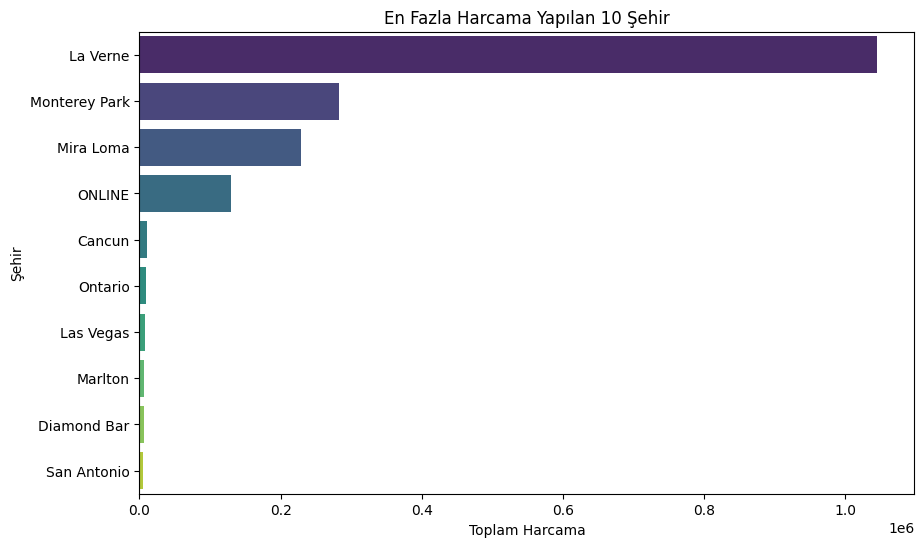

In [4]:
city_expense = data.groupby("Merchant City")["Amount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=city_expense.values, y=city_expense.index, palette="viridis")
plt.title("En Fazla Harcama Yapılan 10 Şehir")
plt.xlabel("Toplam Harcama")
plt.ylabel("Şehir")
plt.show()


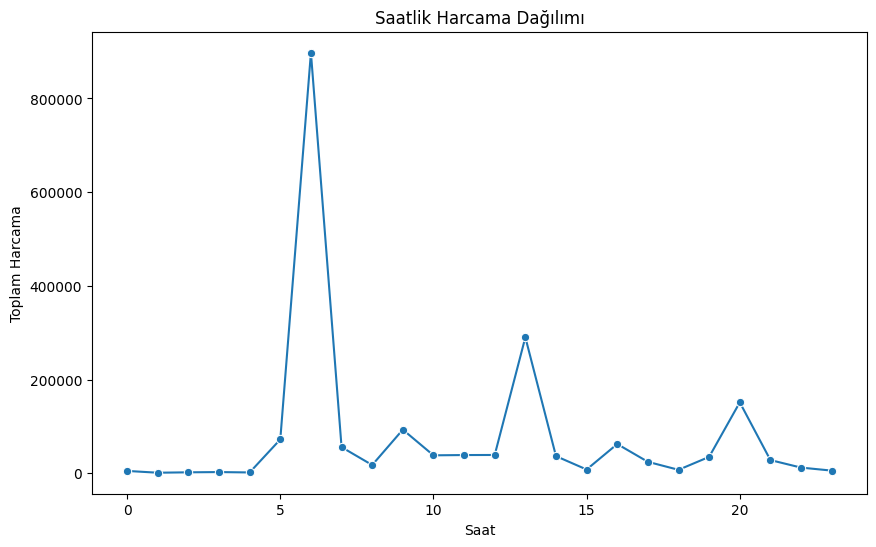

In [11]:
# Time sütunu "HH:MM" formatında, sadece saati al
data["Hour"] = pd.to_datetime(data["Time"], format="%H:%M").dt.hour

# Saatlik toplam harcama
hourly_expense = data.groupby("Hour")["Amount"].sum()

# Grafik
plt.figure(figsize=(10,6))
sns.lineplot(x=hourly_expense.index, y=hourly_expense.values, marker="o")
plt.title("Saatlik Harcama Dağılımı")
plt.xlabel("Saat")
plt.ylabel("Toplam Harcama")
plt.show()


/tmp/ipython-input-3913200445.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_expense.index, y=gender_expense.values, palette="Set2")


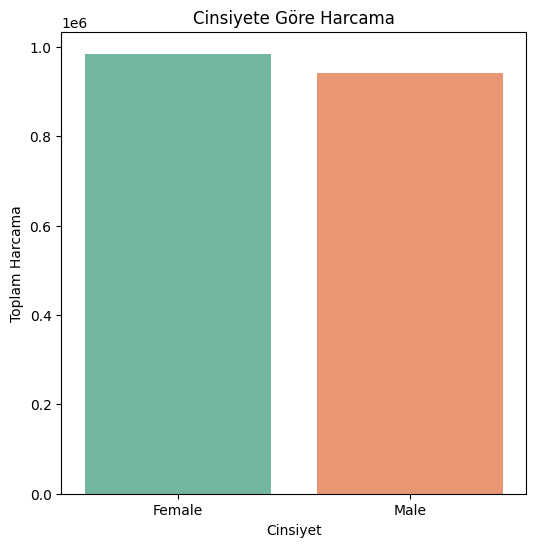

In [12]:
gender_expense = data.groupby("Gender")["Amount"].sum()

plt.figure(figsize=(6,6))
sns.barplot(x=gender_expense.index, y=gender_expense.values, palette="Set2")
plt.title("Cinsiyete Göre Harcama")
plt.xlabel("Cinsiyet")
plt.ylabel("Toplam Harcama")
plt.show()


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1553584893.py:1: SyntaxWarning: invalid escape sequence '\$'
  data["Yearly Income - Person"] = data["Yearly Income - Person"].replace('[\$,]', '', regex=True).astype(float)


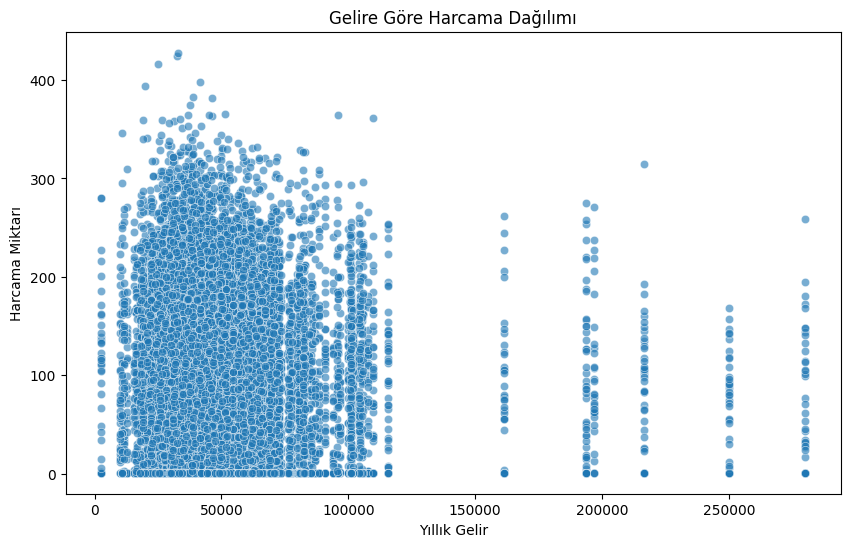

In [13]:
data["Yearly Income - Person"] = data["Yearly Income - Person"].replace('[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(10,6))
sns.scatterplot(x=data["Yearly Income - Person"], y=data["Amount"], alpha=0.6)
plt.title("Gelire Göre Harcama Dağılımı")
plt.xlabel("Yıllık Gelir")
plt.ylabel("Harcama Miktarı")
plt.show()


1.Grafik:
 Grafiğe göre en fazla harcama yapılan şehir açık ara farkla La Verne olmuştur. Onu Monterey Park ve Mira Loma takip etmektedir. Diğer şehirlerdeki harcamalar ise oldukça düşük seviyede kalmıştır. Bu durum harcamaların belirli şehirlerde yoğunlaştığını göstermektedir."
2.Grafik:
 Harcamalar günün her saatine dağılmış olsada özellikle sabah 6 civarında çok büyük artış gözlenmektedir. Diğer saatlerde harcamalar düşük seviyelerde kalmaktadır. Bu durum, belirli saatlerde yoğun harcama eğiliminin olduğunu ve günü geri kalanında harcamaların daha düşük seyrettiğini göstermektedir.
3.Grafik:
 Kadın ve erkek toplam harcama miktarları birbirine çok yakın. Kadın kullanıcılar harcamada çok hafif önde. Arada çok büyük fark olmadığı için cinsiyetin harcama üzerinde belirleyici olmadığı söylenebilir.
4.Grafik:
Düşük ve orta gelir grubunda harcama çeşitliliği çok daha fazla. Gelir arttıkça yapılan harcamların daha sınırlı kaldığı dikkat çekiyor.Yüksek gelir grubundakiler çok harcama yapmıyor, daha düzenli ve düşük miktarlı harcamalar söz konusu.